<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Obtain-Data" data-toc-modified-id="Obtain-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Obtain Data</a></span></li><li><span><a href="#Scrub-Data" data-toc-modified-id="Scrub-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scrub Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Data</a></span><ul class="toc-item"><li><span><a href="#Consider-linearity" data-toc-modified-id="Consider-linearity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Consider linearity</a></span></li><li><span><a href="#Investigate-target-variable" data-toc-modified-id="Investigate-target-variable-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Investigate target variable</a></span></li><li><span><a href="#Explore-multicolinearity" data-toc-modified-id="Explore-multicolinearity-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Explore multicolinearity</a></span></li></ul></li><li><span><a href="#Feature-Engineering-and-Transformations" data-toc-modified-id="Feature-Engineering-and-Transformations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering and Transformations</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-categorical-variables" data-toc-modified-id="Dealing-with-categorical-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dealing with categorical variables</a></span></li><li><span><a href="#Feature-scaling" data-toc-modified-id="Feature-scaling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature scaling</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Model-1" data-toc-modified-id="Model-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Model-2---p-values" data-toc-modified-id="Model-2---p-values-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model 2 - p-values</a></span></li><li><span><a href="#Model-3---take-log" data-toc-modified-id="Model-3---take-log-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model 3 - take log</a></span></li><li><span><a href="#Model-4---feature-selection" data-toc-modified-id="Model-4---feature-selection-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Model 4 - feature selection</a></span></li><li><span><a href="#Next-steps" data-toc-modified-id="Next-steps-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Next steps</a></span></li></ul></li><li><span><a href="#Location-engineering" data-toc-modified-id="Location-engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Location engineering</a></span><ul class="toc-item"><li><span><a href="#Using-Bing-API" data-toc-modified-id="Using-Bing-API-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Using Bing API</a></span></li><li><span><a href="#Using-reverse_geocoder" data-toc-modified-id="Using-reverse_geocoder-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Using reverse_geocoder</a></span></li><li><span><a href="#One-hot-encoding-of-neighbourhood" data-toc-modified-id="One-hot-encoding-of-neighbourhood-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>One-hot encoding of neighbourhood</a></span></li></ul></li><li><span><a href="#Modelling-again" data-toc-modified-id="Modelling-again-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling again</a></span><ul class="toc-item"><li><span><a href="#Model-5" data-toc-modified-id="Model-5-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Model 5</a></span></li><li><span><a href="#Model-6---interactions" data-toc-modified-id="Model-6---interactions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model 6 - interactions</a></span></li><li><span><a href="#Model-7---cat" data-toc-modified-id="Model-7---cat-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Model 7 - cat</a></span></li></ul></li><li><span><a href="#Generate-submissions" data-toc-modified-id="Generate-submissions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Generate submissions</a></span><ul class="toc-item"><li><span><a href="#Model-5-submission" data-toc-modified-id="Model-5-submission-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Model 5 submission</a></span></li><li><span><a href="#Model-6-submission" data-toc-modified-id="Model-6-submission-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Model 6 submission</a></span></li></ul></li></ul></div>

# NYC AirBnB Kaggle Competition

## Obtain Data

In [154]:
#Imports libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import geopy.geocoders


In [155]:
# Load Data
df = pd.read_csv('train.csv')
df.head()

,id,host_id,host_name,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,33400953,3400827,Nicole,40.79595,-73.97485,Entire home/apt,3,2,2019-04-21,0.74,1,0,380
1,16965705,3483600,Joshua,40.83498,-73.94214,Private room,2,0,NaN,NaN,1,0,63
2,34819184,156850005,Sharon,40.75600,-73.87756,Private room,1,1,2019-05-29,0.73,2,355,77
3,22579551,3231509,Annamaria,40.71775,-74.00607,Entire home/apt,14,13,2019-05-08,0.77,4,365,450
4,14571451,32454701,Maria,40.72824,-73.97824,Entire home/apt,1,198,2019-07-06,5.63,1,21,129


In [156]:
df['minimum_nights'].describe()

count    31292.000000
mean         6.965007
std         19.364565
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [157]:
len(df)

31292

## Scrub Data

In [158]:
# Investigate data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31292 entries, 0 to 31291
Data columns (total 13 columns):
id                                31292 non-null int64
host_id                           31292 non-null int64
host_name                         31280 non-null object
latitude                          31292 non-null float64
longitude                         31292 non-null float64
room_type                         31292 non-null object
minimum_nights                    31292 non-null int64
number_of_reviews                 31292 non-null int64
last_review                       24808 non-null object
reviews_per_month                 24808 non-null float64
calculated_host_listings_count    31292 non-null int64
availability_365                  31292 non-null int64
price                             31292 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 3.1+ MB


The data types appear to be correct. For EDA we would look to convert last_review to a DateTime object but as we are focussing on building model we will drop this column.

We will also drop the host_name column as it contains sensitive data and is unecessary for our model.

In [159]:
# Drop host_name and last_review columns
df = df.drop([ 'host_name', 'last_review'], axis = 1)

In [160]:
# Check for duplicates
df.duplicated().sum()

0

In [161]:
# Deal with missing values
df.isna().sum()

id                                   0
host_id                              0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6484
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [162]:
# Investigate reviews_per_month to find suitable value 
df['reviews_per_month'].describe()

count    24808.000000
mean         1.374539
std          1.709655
min          0.010000
25%          0.190000
50%          0.710000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [163]:
# Fill missing values with median
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

## Explore Data

Quick EDA - plot histograms

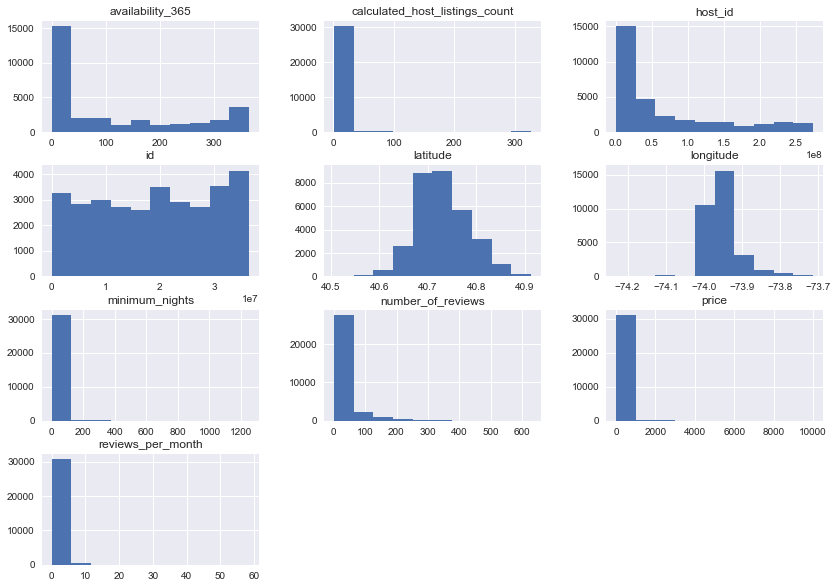

In [164]:
df.hist(figsize = (14,10))
plt.show()

We note that the distributions appear heavily skewed. We will look at transformations to address this.

### Consider linearity

Let us investigate linearity. As one assumption in linear regression is that the target variable is linearly related to the input features, let us investigate linearity.

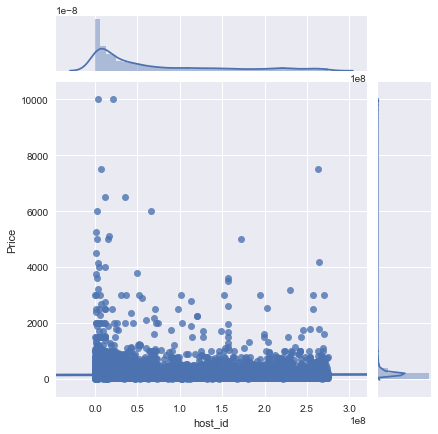

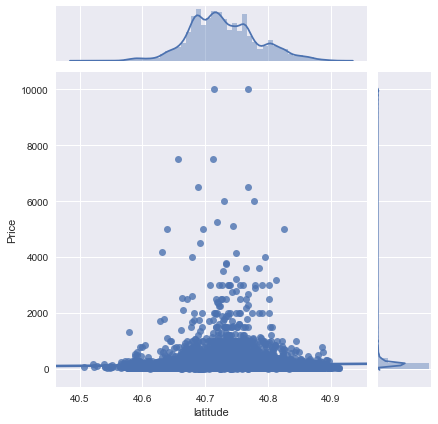

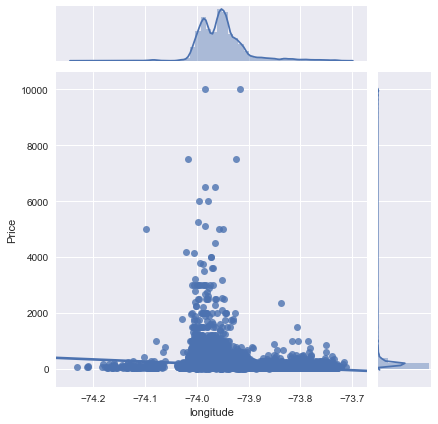

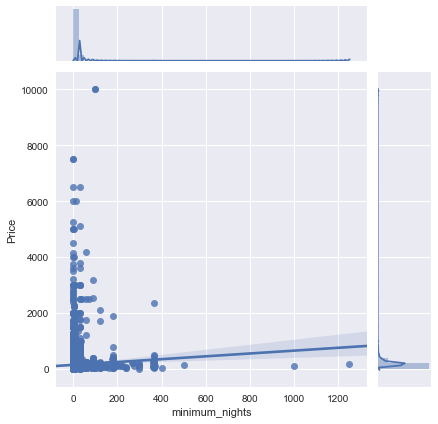

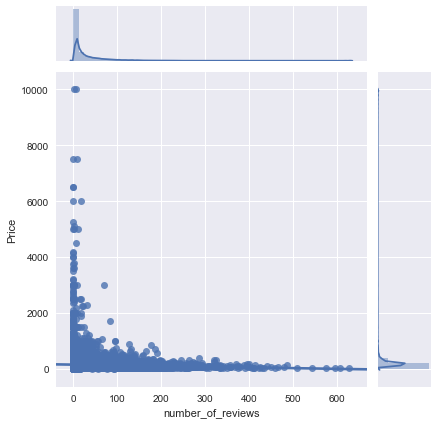

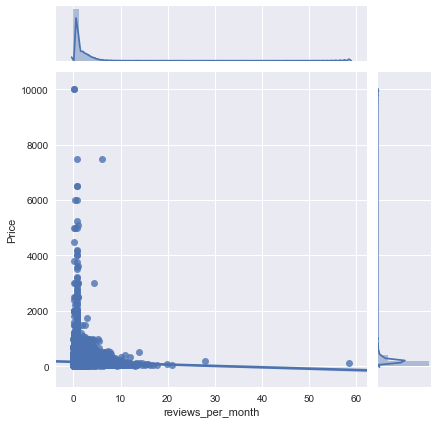

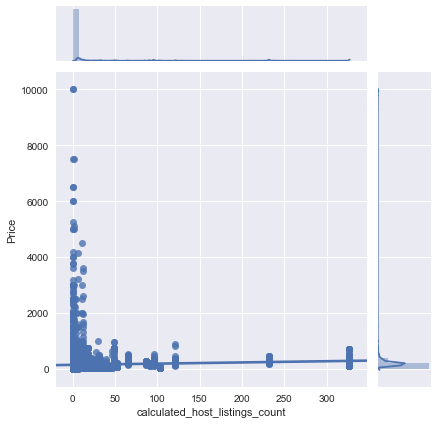

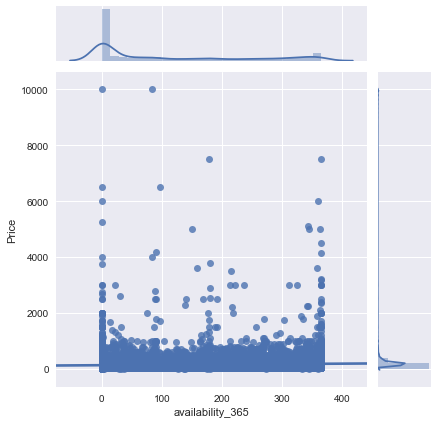

In [165]:
# Use jointplot to plot scatterplot with linear regression line for features against list price

# Define cols with numeric values
relcols = ['host_id', 'latitude', 'longitude', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for col in relcols:
    sns.jointplot(x = df[col], y = df['price'], data = df, kind = 'reg')
    plt.ylabel('Price')
    plt.show()

None of these appear very linear. We might have to work on removing outliers.


### Investigate target variable

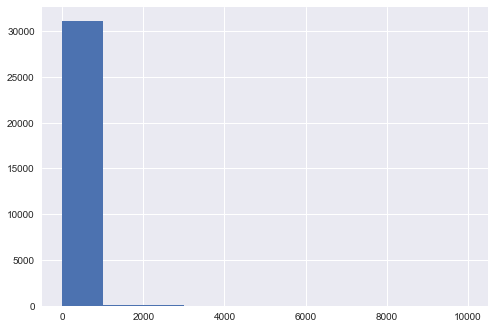

In [166]:
df['price'].hist()
plt.show()

In [167]:
# Remove outliers

# Look at 0.9 percentile
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 265.0
0.91 percentile: 280.0
0.92 percentile: 299.0
0.93 percentile: 300.0
0.94 percentile: 333.0
0.95 percentile: 350.0
0.96 percentile: 400.0
0.97 percentile: 450.0
0.98 percentile: 550.0
0.99 percentile: 790.45


In [168]:
# Choose to remove values with price above 550.
df = df[df['price']<550]

In [169]:
# Choose to remove values with price = 0
df = df[df['price']!=0]

### Explore multicolinearity

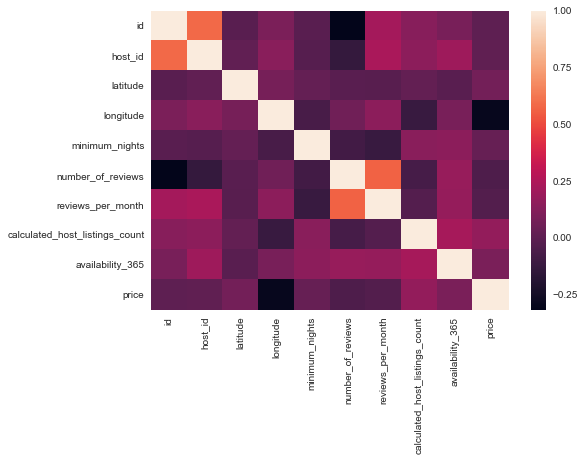

In [170]:
# Compute the correlation matrix
corr = df.corr()

sns.heatmap(corr)
plt.show()

id and host_id features look to be correlated and number_of_reviews and reviews_per month features look to be correlated (as expected). Will need to be careful when building model.

## Feature Engineering and Transformations

### Dealing with categorical variables

The room_type feature is categorical. We will proceed with one-hot encoding using the pd.get_dummies() function.

In [171]:
# Investigate values for room_type
df['room_type'].value_counts()

Entire home/apt    15604
Private room       14291
Shared room          761
Name: room_type, dtype: int64

In [172]:
# Extract column room_type
df_room = df['room_type']

# Get dummy variables and drop first one to not create dependency
df_room = pd.get_dummies(df_room, drop_first = True)

# Check
df_room.head()

,Private room,Shared room
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [173]:
# Recreate df with one-hot encoded variables
df = pd.concat([df, df_room], axis = 1)

# Drop original room_type column
df = df.drop('room_type', axis = 1)

# Check
df.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,Private room,Shared room
0,33400953,3400827,40.79595,-73.97485,3,2,0.74,1,0,380,0,0
1,16965705,3483600,40.83498,-73.94214,2,0,0.71,1,0,63,1,0
2,34819184,156850005,40.75600,-73.87756,1,1,0.73,2,355,77,1,0
3,22579551,3231509,40.71775,-74.00607,14,13,0.77,4,365,450,0,0
4,14571451,32454701,40.72824,-73.97824,1,198,5.63,1,21,129,0,0


### Feature scaling

Let us normalize the data by converting the data to z-scores. This is commonly referred to as standardization.

In [174]:
# Define function for standardising

def std_col(series):
    ''' Converts series into z-score/ standardisation'''
    return (series - np.mean(series))/ np.std(series)

In [175]:
# Define cols with numeric values
relcols = ['host_id','minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for col in relcols:
    df[col] = std_col(df[col])

In [176]:
# Check changes
df.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,Private room,Shared room
0,33400953,-0.814721,40.79595,-73.97485,-0.203288,-0.485433,-0.323611,-0.184951,-0.845056,380,0,0
1,16965705,-0.813662,40.83498,-73.94214,-0.255103,-0.530867,-0.342908,-0.184951,-0.845056,63,1,0
2,34819184,1.149025,40.75600,-73.87756,-0.306918,-0.508150,-0.330044,-0.154455,1.865685,77,1,0
3,22579551,-0.816888,40.71775,-74.00607,0.366673,-0.235544,-0.304314,-0.093463,1.942044,450,0,0
4,14571451,-0.442908,40.72824,-73.97824,-0.306918,3.967126,2.821767,-0.184951,-0.684702,129,0,0


## Model

### Model 1

Let us build an initial model using the cleaned DataFrame and one-hot encoding of room types.

In [177]:
# Define target and features
y = df['price']
X = df.drop('price', axis = 1)

In [178]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model1 = sm.OLS(y,X_int).fit()
model1.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1747.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:07   Log-Likelihood:            -1.7356e+05
No. Observations:               30656   AIC:                         3.471e+05
Df Residuals:                   30644   BIC:                         3.472e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3.639e+04    755.365    -48.182      0.000   -3.79e+04   -3.49e+04
id                              5.141e-09   5.09e-08      0.101      0.920   -9.47e-08    1.05e-07
host_id                            3.4087      0.508      6.711      0.000       2.413       4.404
latitude                         155.0780      7.319     21.188      0.000     140.732     169.424
longitude                       -409.1289      9.035    -45.281      0.000    -426.839    -391.419
minimum_nights                    -5.0849      0.411    -12.385      0.000      -5.890      -4.280
number_of_reviews                 -4.9132      0.587     -8.367      0.000      -6.064      -3.762
reviews_per_month                  1.0676      0.571      1.871      0.061      -0.051       2.186
calculated_host_listings_count     4.5933      0.423     10.857      0.000       3.764       5.423
availability_365                  10.5674      0.434     24.341      0.000       9.716      11.418
Private room                     -92.1468      0.827   -111.418      0.000     -93.768     -90.526
Shared room                     -115.7498      2.603    -44.470      0.000    -120.851    -110.648
==============================================================================
Omnibus:                    11703.421   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53428.515
Skew:                           1.834   Prob(JB):                         0.00
Kurtosis:                       8.327   Cond. No.                     4.16e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Need to address:
- p-values (id is not statistically significant)
- multicollinearity

### Model 2 - p-values

Let us remove `id`, `latitude` and `longitude` features.

In [179]:
y = df['price']
X = df.drop(['price', 'id', 'latitude', 'longitude'], axis = 1)

In [180]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model2 = sm.OLS(y,X_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     1958.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:07   Log-Likelihood:            -1.7469e+05
No. Observations:               30656   AIC:                         3.494e+05
Df Residuals:                   30647   BIC:                         3.495e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            179.9084      0.582    309.013      0.000     178.767     181.050
host_id                            1.7183      0.467      3.678      0.000       0.803       2.634
minimum_nights                    -4.1650      0.426     -9.788      0.000      -4.999      -3.331
number_of_reviews                 -4.6372      0.542     -8.558      0.000      -5.699      -3.575
reviews_per_month                 -1.0520      0.545     -1.930      0.054      -2.120       0.016
calculated_host_listings_count     7.1759      0.434     16.521      0.000       6.325       8.027
availability_365                   8.7767      0.449     19.557      0.000       7.897       9.656
Private room                     -97.8884      0.847   -115.555      0.000     -99.549     -96.228
Shared room                     -120.2312      2.697    -44.574      0.000    -125.518    -114.944
==============================================================================
Omnibus:                    11450.057   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49455.527
Skew:                           1.812   Prob(JB):                         0.00
Kurtosis:                       8.059   Cond. No.                         8.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By removing `id` we have also dealt with multicolinearity. Let us check by computing the Variance Inflation Factor.

In [181]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results = list(zip(X.columns, vif))
vif_results

[('host_id', 1.2781672205281676),
 ('minimum_nights', 1.0618254492784396),
 ('number_of_reviews', 1.7257984969889713),
 ('reviews_per_month', 1.7455358994474615),
 ('calculated_host_listings_count', 1.1005530615951784),
 ('availability_365', 1.1831449596451498),
 ('Private room', 1.0122707259282937),
 ('Shared room', 1.008926175719575)]

All of these are low.

**Model 2 validation**

In [182]:
# Use sklearn 
linreg2 = LinearRegression()

# Fit model
linreg2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
# K-fold validation on training set
scores = cross_val_score(
            linreg2, 
            X,
            y,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [184]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([71.51591872, 73.7454655 , 71.51656382, 74.10814771, 72.60599956,
       72.54423998, 73.35784035, 72.71580289, 70.66482136, 69.76629383])

72.25410937114785

1.3078588666109425

In [185]:
np.mean(df['price'])

131.29084029227556

### Model 3 - take log

In [186]:
y = np.log(df['price'])
X = df.drop(['price', 'id'], axis = 1)

In [187]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model3 = sm.OLS(y,X_int).fit()
model3.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     3147.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:07   Log-Likelihood:                -18509.
No. Observations:               30656   AIC:                         3.704e+04
Df Residuals:                   30645   BIC:                         3.713e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -286.2767      4.802    -59.621      0.000    -295.688    -276.865
host_id                            0.0078      0.003      2.716      0.007       0.002       0.013
latitude                           1.2920      0.047     27.766      0.000       1.201       1.383
longitude                         -3.2280      0.057    -56.189      0.000      -3.341      -3.115
minimum_nights                    -0.0415      0.003    -15.896      0.000      -0.047      -0.036
number_of_reviews                 -0.0237      0.003     -7.138      0.000      -0.030      -0.017
reviews_per_month                  0.0076      0.003      2.268      0.023       0.001       0.014
calculated_host_listings_count     0.0184      0.003      6.848      0.000       0.013       0.024
availability_365                   0.0705      0.003     25.522      0.000       0.065       0.076
Private room                      -0.7557      0.005   -143.708      0.000      -0.766      -0.745
Shared room                       -1.1268      0.017    -68.099      0.000      -1.159      -1.094
==============================================================================
Omnibus:                     1520.473   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2888.199
Skew:                           0.375   Prob(JB):                         0.00
Kurtosis:                       4.303   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model 3 validation**

In [188]:
linreg3 = LinearRegression()

# Fit model
linreg3.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
# K-fold validation on training set
scores = cross_val_score(
            linreg3, 
            X,
            y,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [190]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.44307969, 0.46225895, 0.44210187, 0.44425787, 0.4550165 ,
       0.43549682, 0.43832041, 0.44200327, 0.4422867 , 0.42805318])

0.4432875254436679

0.009055262639400577

### Model 4 - feature selection

In [191]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [192]:
y = df['price']
X = df.drop(['price', 'id'], axis = 1)

In [193]:
feats = stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  longitude                      with p-value 0.0
Add  Private room                   with p-value 0.0
Add  Shared room                    with p-value 0.0
Add  availability_365               with p-value 1.64516e-150
Add  latitude                       with p-value 5.65105e-99
Add  host_id                        with p-value 5.95226e-39
Add  calculated_host_listings_count with p-value 2.55975e-26
Add  minimum_nights                 with p-value 3.70523e-30
Add  number_of_reviews              with p-value 8.18377e-25


In [194]:
y = df['price']
X = df[feats]

In [195]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model4 = sm.OLS(y,X_int).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     2134.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:08   Log-Likelihood:            -1.7356e+05
No. Observations:               30656   AIC:                         3.471e+05
Df Residuals:                   30646   BIC:                         3.472e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -3.626e+04    752.461    -48.193      0.000   -3.77e+04   -3.48e+04
longitude                       -407.5214      9.001    -45.275      0.000    -425.164    -389.879
Private room                     -92.1791      0.827   -111.499      0.000     -93.800     -90.559
Shared room                     -115.8038      2.602    -44.509      0.000    -120.904    -110.704
availability_365                  10.5787      0.434     24.369      0.000       9.728      11.430
latitude                         154.7645      7.316     21.155      0.000     140.425     169.104
host_id                            3.7709      0.421      8.948      0.000       2.945       4.597
calculated_host_listings_count     4.5763      0.422     10.842      0.000       3.749       5.404
minimum_nights                    -5.1431      0.410    -12.556      0.000      -5.946      -4.340
number_of_reviews                 -4.2894      0.417    -10.295      0.000      -5.106      -3.473
==============================================================================
Omnibus:                    11699.696   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53390.776
Skew:                           1.833   Prob(JB):                         0.00
Kurtosis:                       8.325   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
linreg4 = LinearRegression()

# Fit model
linreg4.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
# K-fold validation on training set
scores = cross_val_score(
            linreg4, 
            X,
            y,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [198]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([68.85854971, 71.69147307, 68.65103257, 71.69893834, 70.38172985,
       69.18241038, 70.60368802, 70.11743203, 68.3345924 , 67.00825993])

69.65281062876798

1.434614270332214

### Next steps

- consider outliers in features
- consider polynomial regression

## Location engineering

### Using Bing API

In [199]:
import pickle
import json

from geopy.geocoders import Bing
import geopy.geocoders
from geopy.extra.rate_limiter import RateLimiter


In [200]:
df['coord'] = list(zip(df['latitude'], df['longitude']))

In [201]:
# Function to retrieve json 

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [202]:
# Get api_key

keys = get_keys("/Users/nadine/.api/bing.json")
bing_api_key = keys["api_key"]

In [203]:
# # # Create an empty list to store
#  bingaddresses = []

# # # Call API with key
# geolocator = Bing(api_key=bing_api_key, timeout=60)

# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=2)

# # # Iterate over coordinates and add addresses to list
# for coordinates in df['coord']:
#     loc = geolocator.reverse(coordinates, exactly_one = True, include_country_code=False)
# #     bingaddresses.append(loc)

Method works for retrieving neighbourhood. However we are limited in the number of API calls we can run and so we will not be able to pursue this method as our test data as over 7000 entries.

### Using reverse_geocoder

In [204]:
import reverse_geocoder as rg

Reverse Geocoder takes a list of tuples(of latitude and longitude) as its input.

In [205]:
df['coord'][:100]

0              (40.79595, -73.97485)
1     (40.83498, -73.94214000000002)
2                (40.756, -73.87756)
3              (40.71775, -74.00607)
4              (40.72824, -73.97824)
                   ...              
95             (40.72736, -74.00192)
96    (40.71966, -73.98165999999998)
97              (40.7364, -73.98436)
98             (40.72965, -74.00397)
99             (40.76943, -73.95608)
Name: coord, Length: 100, dtype: object

In [206]:
results = rg.search(list(df['coord']))

In [207]:
results[0]

OrderedDict([('lat', '40.78343'),
             ('lon', '-73.96625'),
             ('name', 'Manhattan'),
             ('admin1', 'New York'),
             ('admin2', 'New York County'),
             ('cc', 'US')])

In [208]:
nbds = [results[i]['name'] for i in range(0, len(results))] 
nbds[:5]

['Manhattan', 'Fort Lee', 'Long Island City', 'New York City', 'New York City']

In [209]:
df['nbd'] = nbds

In [210]:
df.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,Private room,Shared room,coord,nbd
0,33400953,-0.814721,40.79595,-73.97485,-0.203288,-0.485433,-0.323611,-0.184951,-0.845056,380,0,0,"(40.79595, -73.97485)",Manhattan
1,16965705,-0.813662,40.83498,-73.94214,-0.255103,-0.530867,-0.342908,-0.184951,-0.845056,63,1,0,"(40.83498, -73.94214000000002)",Fort Lee
2,34819184,1.149025,40.75600,-73.87756,-0.306918,-0.508150,-0.330044,-0.154455,1.865685,77,1,0,"(40.756, -73.87756)",Long Island City
3,22579551,-0.816888,40.71775,-74.00607,0.366673,-0.235544,-0.304314,-0.093463,1.942044,450,0,0,"(40.71775, -74.00607)",New York City
4,14571451,-0.442908,40.72824,-73.97824,-0.306918,3.967126,2.821767,-0.184951,-0.684702,129,0,0,"(40.72824, -73.97824)",New York City


### One-hot encoding of neighbourhood

In [211]:
# Extract column room_type
df_nbd = df['nbd']

# Get dummy variables and drop first one to not create dependency
df_nbd = pd.get_dummies(df_nbd, drop_first = True)

# Check
df_nbd.head()

,Bayonne,Bellerose,Bellerose Terrace,Bensonhurst,Bloomfield,Borough of Queens,Brooklyn,Carteret,Coney Island,East Atlantic Beach,...,Mount Vernon,New York City,Pelham Manor,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [212]:
# Recreate df with one-hot encoded variables
df = pd.concat([df, df_nbd], axis = 1)

# Drop original room_type column
df = df.drop('nbd', axis = 1)

# Check
df.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,...,Mount Vernon,New York City,Pelham Manor,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers
0,33400953,-0.814721,40.79595,-73.97485,-0.203288,-0.485433,-0.323611,-0.184951,-0.845056,380,...,0,0,0,0,0,0,0,0,0,0
1,16965705,-0.813662,40.83498,-73.94214,-0.255103,-0.530867,-0.342908,-0.184951,-0.845056,63,...,0,0,0,0,0,0,0,0,0,0
2,34819184,1.149025,40.75600,-73.87756,-0.306918,-0.508150,-0.330044,-0.154455,1.865685,77,...,0,0,0,0,0,0,0,0,0,0
3,22579551,-0.816888,40.71775,-74.00607,0.366673,-0.235544,-0.304314,-0.093463,1.942044,450,...,0,1,0,0,0,0,0,0,0,0
4,14571451,-0.442908,40.72824,-73.97824,-0.306918,3.967126,2.821767,-0.184951,-0.684702,129,...,0,1,0,0,0,0,0,0,0,0


## Modelling again

### Model 5

Drop lon and lat now that we have one-hot encoding of nbd instead.

In [213]:
y = df['price']
X = df.drop(['price', 'id', 'coord', 'longitude', 'latitude'], axis = 1)

In [214]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Bayonne,Bellerose,...,Mount Vernon,New York City,Pelham Manor,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers
0,-0.814721,-0.203288,-0.485433,-0.323611,-0.184951,-0.845056,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.813662,-0.255103,-0.530867,-0.342908,-0.184951,-0.845056,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.149025,-0.306918,-0.508150,-0.330044,-0.154455,1.865685,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.816888,0.366673,-0.235544,-0.304314,-0.093463,1.942044,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.442908,-0.306918,3.967126,2.821767,-0.184951,-0.684702,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [215]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model5 = sm.OLS(y,X_int).fit()
model5.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     520.5
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:09   Log-Likelihood:            -1.7276e+05
No. Observations:               30656   AIC:                         3.456e+05
Df Residuals:                   30613   BIC:                         3.460e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            215.9152     30.347      7.115      0.000     156.434     275.396
host_id                            3.1515      0.443      7.111      0.000       2.283       4.020
minimum_nights                    -5.0945      0.401    -12.719      0.000      -5.880      -4.309
number_of_reviews                 -4.7534      0.510     -9.325      0.000      -5.753      -3.754
reviews_per_month                 -0.1042      0.514     -0.203      0.839      -1.112       0.904
calculated_host_listings_count     3.4179      0.413      8.275      0.000       2.608       4.227
availability_365                  11.3411      0.426     26.611      0.000      10.506      12.176
Private room                     -88.8104      0.813   -109.301      0.000     -90.403     -87.218
Shared room                     -112.2245      2.544    -44.106      0.000    -117.212    -107.237
Bayonne                          -80.8196     30.933     -2.613      0.009    -141.450     -20.189
Bellerose                        -58.2378     42.916     -1.357      0.175    -142.354      25.879
Bellerose Terrace                -72.2298     31.292     -2.308      0.021    -133.563     -10.897
Bensonhurst                      -80.5993     30.485     -2.644      0.008    -140.351     -20.847
Bloomfield                       -90.9983     35.706     -2.549      0.011    -160.985     -21.012
Borough of Queens                -76.5689     30.510     -2.510      0.012    -136.371     -16.767
Brooklyn                         -61.4331     30.357     -2.024      0.043    -120.934      -1.932
Carteret                         -86.8551     56.767     -1.530      0.126    -198.120      24.410
Coney Island                     -80.9391     31.073     -2.605      0.009    -141.844     -20.034
East Atlantic Beach              -62.0845     31.340     -1.981      0.048    -123.512      -0.657
East New York                    -75.7697     30.385     -2.494      0.013    -135.325     -16.214
Eastchester                      -85.4216     31.268     -2.732      0.006    -146.708     -24.135
Edgewater                        -56.1907     30.404     -1.848      0.065    -115.784       3.403
Elmont                           -66.6521     33.928     -1.964      0.049    -133.153      -0.151
Fort Lee                         -59.8671     30.873     -1.939      0.052    -120.379       0.645
Great Neck Estates               -92.8700     74.325     -1.250      0.211    -238.550      52.810
Guttenberg                        15.0974     31.125      0.485      0.628     -45.908      76.103
Hoboken                           29.5881     32.188      0.919      0.358     -33.501      92.677
Inwood                           -71.9185     30.420     -2.364      0.018    -131.543     -12.294
Jamaica       

In [216]:
feats = stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True)

Add  Private room                   with p-value 0.0
Add  Shared room                    with p-value 0.0
Add  New York City                  with p-value 5.2303e-293
Add  Manhattan                      with p-value 5.35555e-156
Add  Weehawken                      with p-value 4.12614e-168
Add  availability_365               with p-value 2.22323e-132
Add  Long Island City               with p-value 1.04806e-142
Add  number_of_reviews              with p-value 4.19189e-38
Add  minimum_nights                 with p-value 1.52457e-32
Add  Guttenberg                     with p-value 1.9302e-31
Add  calculated_host_listings_count with p-value 2.82566e-21
Add  Hoboken                        with p-value 8.36272e-19
Add  Brooklyn                       with p-value 3.70662e-14
Add  Edgewater                      with p-value 2.81175e-17
Add  host_id                        with p-value 5.64117e-14
Add  Staten Island                  with p-value 0.00343151
Add  Fort Lee                       wi

In [217]:
y = df['price']
X = df[feats]

In [218]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model5 = sm.OLS(y,X_int).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1213.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:19   Log-Likelihood:            -1.7278e+05
No. Observations:               30656   AIC:                         3.456e+05
Df Residuals:                   30637   BIC:                         3.457e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            139.6287      1.118    124.844      0.000     137.437     141.821
Private room                     -88.7265      0.812   -109.312      0.000     -90.317     -87.136
Shared room                     -112.3807      2.541    -44.234      0.000    -117.360    -107.401
New York City                     70.0112      1.391     50.339      0.000      67.285      72.737
Manhattan                         54.8887      1.441     38.098      0.000      52.065      57.713
Weehawken                         80.5396      2.402     33.527      0.000      75.831      85.248
availability_365                  11.2793      0.425     26.523      0.000      10.446      12.113
Long Island City                  36.5113      1.297     28.149      0.000      33.969      39.054
number_of_reviews                 -4.8323      0.406    -11.899      0.000      -5.628      -4.036
minimum_nights                    -5.0754      0.399    -12.709      0.000      -5.858      -4.293
Guttenberg                        91.3538      7.003     13.044      0.000      77.627     105.081
calculated_host_listings_count     3.4454      0.413      8.348      0.000       2.636       4.254
Hoboken                          105.8421     10.789      9.810      0.000      84.695     126.989
Brooklyn                          14.8137      1.348     10.991      0.000      12.172      17.455
Edgewater                         20.0495      2.169      9.245      0.000      15.799      24.300
host_id                            3.0752      0.413      7.452      0.000       2.266       3.884
Staten Island                    -22.1652      8.005     -2.769      0.006     -37.855      -6.476
Fort Lee                          16.3676      5.782      2.831      0.005       5.034      27.701
Jamaica                            8.0889      3.066      2.638      0.008       2.079      14.098
==============================================================================
Omnibus:                    12028.637   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57465.381
Skew:                           1.874   Prob(JB):                         0.00
Kurtosis:                       8.563   Cond. No.                         33.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
linreg5 = LinearRegression()

# Fit model
linreg5.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
# K-fold validation on training set
scores = cross_val_score(
            linreg5, 
            X,
            y,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [221]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([66.81242686, 69.42819014, 66.67991518, 70.17284936, 68.60457816,
       67.5121031 , 68.60814736, 68.45627853, 67.0188528 , 65.80930881])

67.91026502998083

1.2952529048809758

### Model 6 - interactions

In [222]:
y = df['price']
X = df[feats]

In [223]:
X.head()

,Private room,Shared room,New York City,Manhattan,Weehawken,availability_365,Long Island City,number_of_reviews,minimum_nights,Guttenberg,calculated_host_listings_count,Hoboken,Brooklyn,Edgewater,host_id,Staten Island,Fort Lee,Jamaica
0,0,0,0,1,0,-0.845056,0,-0.485433,-0.203288,0,-0.184951,0,0,0,-0.814721,0,0,0
1,1,0,0,0,0,-0.845056,0,-0.530867,-0.255103,0,-0.184951,0,0,0,-0.813662,0,1,0
2,1,0,0,0,0,1.865685,1,-0.508150,-0.306918,0,-0.154455,0,0,0,1.149025,0,0,0
3,0,0,1,0,0,1.942044,0,-0.235544,0.366673,0,-0.093463,0,0,0,-0.816888,0,0,0
4,0,0,1,0,0,-0.684702,0,3.967126,-0.306918,0,-0.184951,0,0,0,-0.442908,0,0,0


In [224]:
# Consider interactions
from itertools import combinations
from sklearn.model_selection import KFold

interactions = []

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg5, X, y, scoring='r2', cv=crossvalidation))

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg5, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
Top 3 interactions: [('Private room', 'New York City', 0.416), ('Private room', 'availability_365', 0.416), ('Private room', 'host_id', 0.416)]


In [225]:
# Add interactions

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

final = X.copy()

final['PR_NYC'] = final['Private room'] * final['New York City']
final['PR_availability_365'] = final['Private room'] * final['availability_365']
final['PR_host_id'] = final['Private room'] * final['host_id']

final_model = np.mean(cross_val_score(linreg5, final, y, scoring='r2', cv=crossvalidation))

final_model

0.4184376390378618

In [226]:
# statsmodel way to see p-values

X_int = sm.add_constant(final)
model6 = sm.OLS(y,X_int).fit()
model6.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1056.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:16:34   Log-Likelihood:            -1.7267e+05
No. Observations:               30656   AIC:                         3.454e+05
Df Residuals:                   30634   BIC:                         3.456e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            138.4147      1.137    121.693      0.000     136.185     140.644
Private room                     -86.0702      0.883    -97.470      0.000     -87.801     -84.339
Shared room                     -114.5329      2.546    -44.983      0.000    -119.523    -109.542
New York City                     76.5848      1.594     48.050      0.000      73.461      79.709
Manhattan                         55.3066      1.438     38.449      0.000      52.487      58.126
Weehawken                         81.3058      2.396     33.932      0.000      76.609      86.002
availability_365                  15.0873      0.583     25.879      0.000      13.945      16.230
Long Island City                  36.1490      1.295     27.919      0.000      33.611      38.687
number_of_reviews                 -4.9476      0.405    -12.215      0.000      -5.741      -4.154
minimum_nights                    -5.2763      0.399    -13.212      0.000      -6.059      -4.494
Guttenberg                        91.9104      6.982     13.163      0.000      78.225     105.596
calculated_host_listings_count     2.1936      0.421      5.214      0.000       1.369       3.018
Hoboken                          106.5989     10.755      9.912      0.000      85.519     127.679
Brooklyn                          14.8099      1.344     11.018      0.000      12.175      17.445
Edgewater                         19.4863      2.162      9.012      0.000      15.248      23.724
host_id                            5.5566      0.562      9.885      0.000       4.455       6.658
Staten Island                    -20.4017      7.980     -2.556      0.011     -36.044      -4.760
Fort Lee                          15.3767      5.763      2.668      0.008       4.080      26.673
Jamaica                            8.6950      3.056      2.845      0.004       2.704      14.686
PR_NYC                           -18.3092      2.153     -8.505      0.000     -22.529     -14.090
PR_availability_365               -7.5329      0.806     -9.347      0.000      -9.112      -5.953
PR_host_id                        -5.0664      0.799     -6.342      0.000      -6.632      -3.501
==============================================================================
Omnibus:                    12086.982   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58691.731
Skew:                           1.878   Prob(JB):                         0.00
Kurtosis:                       8.643   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# scikit learn way

# generate linreg
linreg6 = LinearRegression()

# Fit model
linreg6.fit(final, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
# K-fold validation on training set
scores = cross_val_score(
            linreg6, 
            final,
            y,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [229]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([66.6228012 , 69.11753819, 66.38626955, 70.0099942 , 68.45989224,
       67.20188888, 68.29006441, 68.14275136, 66.8474893 , 65.77879138])

67.6857480719556

1.265593704351857

### Model 7 - cat

In [230]:
# define de-standardisation function
# run it on num of review column
# define bins for numofreview
# sort into bins
# one-hot encode num of reviews
# generate model with Stats OLS
# evaluate model with scikit learn cross valuation
# reconsider feature selection (using stepwise selection function)
# decide if worth keeping/ generating predictions using test data / generate submission 

In [231]:
df.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,...,Mount Vernon,New York City,Pelham Manor,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers
0,33400953,-0.814721,40.79595,-73.97485,-0.203288,-0.485433,-0.323611,-0.184951,-0.845056,380,...,0,0,0,0,0,0,0,0,0,0
1,16965705,-0.813662,40.83498,-73.94214,-0.255103,-0.530867,-0.342908,-0.184951,-0.845056,63,...,0,0,0,0,0,0,0,0,0,0
2,34819184,1.149025,40.75600,-73.87756,-0.306918,-0.508150,-0.330044,-0.154455,1.865685,77,...,0,0,0,0,0,0,0,0,0,0
3,22579551,-0.816888,40.71775,-74.00607,0.366673,-0.235544,-0.304314,-0.093463,1.942044,450,...,0,1,0,0,0,0,0,0,0,0
4,14571451,-0.442908,40.72824,-73.97824,-0.306918,3.967126,2.821767,-0.184951,-0.684702,129,...,0,1,0,0,0,0,0,0,0,0


In [232]:
df2 = pd.read_csv('train.csv')

In [233]:
df2.head()

,id,host_id,host_name,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,33400953,3400827,Nicole,40.79595,-73.97485,Entire home/apt,3,2,2019-04-21,0.74,1,0,380
1,16965705,3483600,Joshua,40.83498,-73.94214,Private room,2,0,NaN,NaN,1,0,63
2,34819184,156850005,Sharon,40.75600,-73.87756,Private room,1,1,2019-05-29,0.73,2,355,77
3,22579551,3231509,Annamaria,40.71775,-74.00607,Entire home/apt,14,13,2019-05-08,0.77,4,365,450
4,14571451,32454701,Maria,40.72824,-73.97824,Entire home/apt,1,198,2019-07-06,5.63,1,21,129


In [234]:
df2 = df2[['id', 'minimum_nights']]
df2.head()

,id,minimum_nights
0,33400953,3
1,16965705,2
2,34819184,1
3,22579551,14
4,14571451,1


In [235]:
df = df.drop('minimum_nights', axis = 1)

In [236]:
df = pd.merge(df, df2, on=['id'])

In [237]:
df.head()

,id,host_id,latitude,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,Private room,...,New York City,Pelham Manor,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers,minimum_nights
0,33400953,-0.814721,40.79595,-73.97485,-0.485433,-0.323611,-0.184951,-0.845056,380,0,...,0,0,0,0,0,0,0,0,0,3
1,16965705,-0.813662,40.83498,-73.94214,-0.530867,-0.342908,-0.184951,-0.845056,63,1,...,0,0,0,0,0,0,0,0,0,2
2,34819184,1.149025,40.75600,-73.87756,-0.508150,-0.330044,-0.154455,1.865685,77,1,...,0,0,0,0,0,0,0,0,0,1
3,22579551,-0.816888,40.71775,-74.00607,-0.235544,-0.304314,-0.093463,1.942044,450,0,...,1,0,0,0,0,0,0,0,0,14
4,14571451,-0.442908,40.72824,-73.97824,3.967126,2.821767,-0.184951,-0.684702,129,0,...,1,0,0,0,0,0,0,0,0,1


In [238]:
df['minimum_nights'].describe()

count    30656.000000
mean         6.923376
std         19.299861
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [239]:
# Define bins based on statistics
mnbins = [0, 1, 2, 5, 1300]
names = ["min_one", "min_two", "min_three_to_five", "min_more_than_five"]

# Map to bins using pd.cut()
df['min_nights_cat'] = pd.cut(df['minimum_nights'], bins = mnbins, labels = names)

In [240]:
df['min_nights_cat'].head()

0     min_three_to_five
1               min_two
2               min_one
3    min_more_than_five
4               min_one
Name: min_nights_cat, dtype: category
Categories (4, object): [min_one < min_two < min_three_to_five < min_more_than_five]

In [241]:
# Extract column room_type
df_mn = df['min_nights_cat']

# Get dummy variables and drop first one to not create dependency
df_mn = pd.get_dummies(df_mn, drop_first = True)

df_mn.head()

min_nights_cat,min_two,min_three_to_five,min_more_than_five
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,1
4,0,0,0


In [242]:
# Recreate df with one-hot encoded variables
df = pd.concat([df, df_mn], axis = 1)

# Drop original room_type column
df = df.drop(['min_nights_cat', 'minimum_nights'], axis = 1)

# Check
df.head()

,id,host_id,latitude,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,Private room,...,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers,min_two,min_three_to_five,min_more_than_five
0,33400953,-0.814721,40.79595,-73.97485,-0.485433,-0.323611,-0.184951,-0.845056,380,0,...,0,0,0,0,0,0,0,0,1,0
1,16965705,-0.813662,40.83498,-73.94214,-0.530867,-0.342908,-0.184951,-0.845056,63,1,...,0,0,0,0,0,0,0,1,0,0
2,34819184,1.149025,40.75600,-73.87756,-0.508150,-0.330044,-0.154455,1.865685,77,1,...,0,0,0,0,0,0,0,0,0,0
3,22579551,-0.816888,40.71775,-74.00607,-0.235544,-0.304314,-0.093463,1.942044,450,0,...,0,0,0,0,0,0,0,0,0,1
4,14571451,-0.442908,40.72824,-73.97824,3.967126,2.821767,-0.184951,-0.684702,129,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
y = df['price']
X = df.drop(['price', 'id', 'coord', 'longitude', 'latitude'], axis = 1)

In [244]:
X.head()

,host_id,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Bayonne,Bellerose,Bellerose Terrace,...,Perth Amboy,Sewaren,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers,min_two,min_three_to_five,min_more_than_five
0,-0.814721,-0.485433,-0.323611,-0.184951,-0.845056,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.813662,-0.530867,-0.342908,-0.184951,-0.845056,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.149025,-0.508150,-0.330044,-0.154455,1.865685,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.816888,-0.235544,-0.304314,-0.093463,1.942044,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.442908,3.967126,2.821767,-0.184951,-0.684702,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
# Fit model onto training set X
X_int = sm.add_constant(X)
model7 = sm.OLS(y,X_int).fit()
model7.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     511.5
Date:                Sat, 25 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:18:42   Log-Likelihood:            -1.7257e+05
No. Observations:               30656   AIC:                         3.452e+05
Df Residuals:                   30611   BIC:                         3.456e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            223.9120     30.171      7.421      0.000     164.775     283.049
host_id                            2.8581      0.442      6.472      0.000       1.993       3.724
number_of_reviews                 -5.4731      0.508    -10.768      0.000      -6.469      -4.477
reviews_per_month                 -1.0764      0.520     -2.070      0.038      -2.095      -0.057
calculated_host_listings_count     4.4882      0.415     10.812      0.000       3.675       5.302
availability_365                  12.2598      0.425     28.838      0.000      11.427      13.093
Private room                     -88.9786      0.824   -108.011      0.000     -90.593     -87.364
Shared room                     -112.7490      2.548    -44.242      0.000    -117.744    -107.754
Bayonne                          -88.1602     30.748     -2.867      0.004    -148.428     -27.892
Bellerose                        -67.4798     42.660     -1.582      0.114    -151.096      16.136
Bellerose Terrace                -78.6766     31.104     -2.529      0.011    -139.642     -17.712
Bensonhurst                      -85.4040     30.302     -2.818      0.005    -144.797     -26.011
Bloomfield                       -95.4269     35.491     -2.689      0.007    -164.991     -25.863
Borough of Queens                -82.0198     30.327     -2.705      0.007    -141.462     -22.578
Brooklyn                         -66.1099     30.175     -2.191      0.028    -125.253      -6.967
Carteret                         -95.1714     56.425     -1.687      0.092    -205.767      15.424
Coney Island                     -83.9793     30.886     -2.719      0.007    -144.516     -23.442
East Atlantic Beach              -66.3057     31.151     -2.129      0.033    -127.363      -5.249
East New York                    -80.5966     30.202     -2.669      0.008    -139.794     -21.399
Eastchester                      -91.5948     31.080     -2.947      0.003    -152.514     -30.676
Edgewater                        -60.6811     30.221     -2.008      0.045    -119.916      -1.446
Elmont                           -72.3868     33.724     -2.146      0.032    -138.487      -6.286
Fort Lee                         -65.7319     30.687     -2.142      0.032    -125.881      -5.583
Great Neck Estates              -101.9756     73.879     -1.380      0.168    -246.781      42.830
Guttenberg                        10.9462     30.937      0.354      0.723     -49.692      71.584
Hoboken                           23.9627     31.993      0.749      0.454     -38.744      86.670
Inwood                           -77.4389     30.237     -2.561      0.010    -136.705     -18.173
Jamaica                          -73.6403     30.301     -2.430      0.015    -133.031     -14.250
Kings Point   

In [246]:
feats = stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True)

Add  Private room                   with p-value 0.0
Add  Shared room                    with p-value 0.0
Add  New York City                  with p-value 5.2303e-293
Add  Manhattan                      with p-value 5.35555e-156
Add  Weehawken                      with p-value 4.12614e-168
Add  availability_365               with p-value 2.22323e-132
Add  Long Island City               with p-value 1.04806e-142
Add  min_more_than_five             with p-value 1.34663e-72
Add  number_of_reviews              with p-value 3.78031e-65
Add  calculated_host_listings_count with p-value 9.6213e-33
Add  Guttenberg                     with p-value 3.51681e-32
Add  Hoboken                        with p-value 9.01652e-19
Add  Brooklyn                       with p-value 9.6058e-17
Add  Edgewater                      with p-value 1.31593e-19
Add  host_id                        with p-value 5.14287e-09
Add  Staten Island                  with p-value 0.00258394
Add  Fort Lee                       wit

In [247]:
y = df['price']
X = df[feats]

In [248]:
# Consider interactions
from itertools import combinations
from sklearn.model_selection import KFold

interactions = []

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(linreg5, X, y, scoring='r2', cv=crossvalidation))

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(linreg5, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
Top 3 interactions: [('Private room', 'availability_365', 0.424), ('Private room', 'New York City', 0.423), ('Private room', 'host_id', 0.423)]


In [250]:
# Add interactions
X['PR_NYC'] = X['Private room'] * X['New York City']
X['PR_availability_365'] = X['Private room'] * X['availability_365']
X['PR_host_id'] = X['Private room'] * X['host_id']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [251]:
# generate linreg
linreg7 = LinearRegression()

# Fit model
linreg7.fit(final, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
# K-fold validation on training set
scores = cross_val_score(
            linreg7, 
            X,
            y,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [253]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([66.11039385, 68.37651593, 66.27444537, 69.64421481, 67.47597389,
       66.86707398, 68.05977064, 67.82781814, 66.52136294, 65.29217023])

67.24497397766413

1.21666623622655

## Generate submissions

### Model 5 submission

In [78]:
test = pd.read_csv('test.csv')

In [79]:
# Create submission DF
submission = pd.DataFrame()

# Define idf column before we remove it for modelling
submission['id'] = test['id']

In [80]:
# Apply transformations to test dataset

# Drop host_name and last_review columns
test = test.drop([ 'host_name', 'last_review'], axis = 1)

# Fill missing values with median
test['reviews_per_month'] = test['reviews_per_month'].fillna(df['reviews_per_month'].median())

# Extract column room_type
test_room = test['room_type']

# Get dummy variables and drop first one to not create dependency
test_room = pd.get_dummies(test_room, drop_first = True)

# Recreate df with one-hot encoded variables
test = pd.concat([test, test_room], axis = 1)

# Drop original room_type column
test = test.drop('room_type', axis = 1)

# Define cols with numeric values
relcols = ['host_id', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Apply standardisation
for col in relcols:
    test[col] = std_col(test[col])

# Get geo
test['coord'] = list(zip(test['latitude'], test['longitude']))
results = rg.search(list(test['coord']))
nbds = [results[i]['name'] for i in range(0, len(results))] 
test['nbd'] = nbds


# one-hot geo
# Extract column room_type
test_nbd = test['nbd']
# Get dummy variables and drop first one to not create dependency
test_nbd = pd.get_dummies(test_nbd, drop_first = True)
# Recreate df with one-hot encoded variables
test = pd.concat([test, test_nbd], axis = 1)
# Drop original room_type column
test = test.drop('nbd', axis = 1)


# Drop id column
test = test.drop(['id', 'coord', 'longitude', 'latitude'], axis = 1)

# Check
test.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Bayonne,Bellerose Terrace,...,Manhattan,Mount Vernon,New York City,Pelham Manor,Perth Amboy,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers
0,0.367560,-0.203168,0.037641,0.224702,-0.122161,1.713544,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.664544,1.081675,-0.413683,1.403773,-0.183310,1.653030,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.502419,-0.107995,-0.521141,-0.851758,-0.183310,-0.865869,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2.366348,1.129262,-0.413683,0.537892,-0.183310,0.790704,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.702682,-0.298342,-0.069818,0.746686,-0.183310,-0.245600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
len(test)

7824

In [82]:
testfeats = test[feats]

In [83]:
# Generate predictions
predictions = linreg5.predict(testfeats)

In [84]:
# Define price in our submission DataFrame
submission['price'] = predictions

In [85]:
# Check
submission.head()

,id,price
0,21399885,160.514940
1,35037136,226.206065
2,13330602,200.763332
3,33951037,221.471462
4,28692911,150.731285


In [86]:
# save file
submission.to_csv('submission5.csv', index=False)

### Model 6 submission

In [87]:
test = pd.read_csv('test.csv')
test

,id,host_id,host_name,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21399885,96664487,Hupeto,40.68742,-73.91628,Entire home/apt,3,26,2019-06-18,1.41,3,341
1,35037136,120111937,Madea And Julian,40.70865,-73.96673,Entire home/apt,30,5,2019-06-23,3.33,1,333
2,13330602,27977872,Dana,40.70716,-74.01155,Entire home/apt,5,0,NaN,NaN,1,0
3,33951037,254472726,Jerick,40.73198,-74.00526,Entire home/apt,31,5,2019-05-23,1.92,1,219
4,28692911,12166742,Yizak,40.62515,-73.94409,Entire home/apt,1,21,2019-07-05,2.26,1,82
...,...,...,...,...,...,...,...,...,...,...,...,...
7819,11971580,5388411,Timothy,40.82776,-73.94701,Entire home/apt,3,0,NaN,NaN,1,0
7820,21027995,82349344,Maxim,40.70911,-73.95288,Private room,2,79,2019-06-24,4.56,1,349
7821,21997208,154608871,Daniel,40.78707,-73.97690,Entire home/apt,2,0,NaN,NaN,1,0
7822,25519081,21364540,Francisca,40.70312,-73.93808,Private room,4,0,NaN,NaN,2,0


In [88]:
# Apply transformations to test dataset

# Drop host_name and last_review columns
test = test.drop([ 'host_name', 'last_review'], axis = 1)

# Fill missing values with median
test['reviews_per_month'] = test['reviews_per_month'].fillna(df['reviews_per_month'].median())

# Extract column room_type
test_room = test['room_type']

# Get dummy variables and drop first one to not create dependency
test_room = pd.get_dummies(test_room, drop_first = True)

# Recreate df with one-hot encoded variables
test = pd.concat([test, test_room], axis = 1)

# Drop original room_type column
test = test.drop('room_type', axis = 1)

# Define cols with numeric values
relcols = ['host_id', 'minimum_nights', 
           'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Apply standardisation
for col in relcols:
    test[col] = std_col(test[col])

# Get geo
test['coord'] = list(zip(test['latitude'], test['longitude']))
results = rg.search(list(test['coord']))
nbds = [results[i]['name'] for i in range(0, len(results))] 
test['nbd'] = nbds


# one-hot geo
# Extract column room_type
test_nbd = test['nbd']
# Get dummy variables and drop first one to not create dependency
test_nbd = pd.get_dummies(test_nbd, drop_first = True)
# Recreate df with one-hot encoded variables
test = pd.concat([test, test_nbd], axis = 1)
# Drop original room_type column
test = test.drop('nbd', axis = 1)


# Drop id column
test = test.drop(['id', 'coord', 'longitude', 'latitude'], axis = 1)

# Check
test.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private room,Shared room,Bayonne,Bellerose Terrace,...,Manhattan,Mount Vernon,New York City,Pelham Manor,Perth Amboy,South Valley Stream,Staten Island,The Bronx,Weehawken,Yonkers
0,0.367560,-0.203168,0.037641,0.224702,-0.122161,1.713544,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.664544,1.081675,-0.413683,1.403773,-0.183310,1.653030,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.502419,-0.107995,-0.521141,-0.851758,-0.183310,-0.865869,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2.366348,1.129262,-0.413683,0.537892,-0.183310,0.790704,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.702682,-0.298342,-0.069818,0.746686,-0.183310,-0.245600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
testrelfeats = test[feats]

In [90]:
testrelfeats.head()

,Private room,Shared room,New York City,Manhattan,Weehawken,availability_365,Long Island City,number_of_reviews,minimum_nights,Guttenberg,calculated_host_listings_count,Hoboken,Brooklyn,Edgewater,host_id,Staten Island,Fort Lee,Jamaica
0,0,0,0,0,0,1.713544,0,0.037641,-0.203168,0,-0.122161,0,0,0,0.367560,0,0,0
1,0,0,1,0,0,1.653030,0,-0.413683,1.081675,0,-0.183310,0,0,0,0.664544,0,0,0
2,0,0,1,0,0,-0.865869,0,-0.521141,-0.107995,0,-0.183310,0,0,0,-0.502419,0,0,0
3,0,0,1,0,0,0.790704,0,-0.413683,1.129262,0,-0.183310,0,0,0,2.366348,0,0,0
4,0,0,0,0,0,-0.245600,0,-0.069818,-0.298342,0,-0.183310,0,1,0,-0.702682,0,0,0


In [91]:
testrelfeats['PR_NYC'] = testrelfeats['Private room'] * testrelfeats['New York City']
testrelfeats['PR_availability_365'] = testrelfeats['Private room'] * testrelfeats['availability_365']
testrelfeats['PR_host_id'] = testrelfeats['Private room'] * testrelfeats['host_id']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [92]:
testrelfeats

,Private room,Shared room,New York City,Manhattan,Weehawken,availability_365,Long Island City,number_of_reviews,minimum_nights,Guttenberg,...,Hoboken,Brooklyn,Edgewater,host_id,Staten Island,Fort Lee,Jamaica,PR_NYC,PR_availability_365,PR_host_id
0,0,0,0,0,0,1.713544,0,0.037641,-0.203168,0,...,0,0,0,0.367560,0,0,0,0,0.000000,0.000000
1,0,0,1,0,0,1.653030,0,-0.413683,1.081675,0,...,0,0,0,0.664544,0,0,0,0,0.000000,0.000000
2,0,0,1,0,0,-0.865869,0,-0.521141,-0.107995,0,...,0,0,0,-0.502419,0,0,0,0,-0.000000,-0.000000
3,0,0,1,0,0,0.790704,0,-0.413683,1.129262,0,...,0,0,0,2.366348,0,0,0,0,0.000000,0.000000
4,0,0,0,0,0,-0.245600,0,-0.069818,-0.298342,0,...,0,1,0,-0.702682,0,0,0,0,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7819,0,0,0,0,0,-0.865869,0,-0.521141,-0.203168,0,...,0,0,1,-0.788536,0,0,0,0,-0.000000,-0.000000
7820,1,0,0,0,0,1.774058,1,1.176696,-0.250755,0,...,0,0,0,0.186246,0,0,0,0,1.774058,0.186246
7821,0,0,0,1,0,-0.865869,0,-0.521141,-0.250755,0,...,0,0,0,1.101480,0,0,0,0,-0.000000,0.000000
7822,1,0,0,0,0,-0.865869,1,-0.521141,-0.155582,0,...,0,0,0,-0.586183,0,0,0,0,-0.865869,-0.586183


In [93]:
# Generate predictions
predictions = linreg6.predict(testrelfeats)

In [94]:
# Define price in our submission DataFrame
submission['price'] = predictions

In [95]:
submission.head()

,id,price
0,21399885,166.927616
1,35037136,239.569331
2,13330602,201.890211
3,33951037,235.764395
4,28692911,147.132089


In [96]:
# save file
submission.to_csv('submission6.csv', index=False)